In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/MDS_project')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/MDS_project


# 1.Data Pre-processing

In [ ]:
import numpy as np
from numpy import log, dot, shape
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/MDS_project/HeartDisease.csv')

In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Printing the sum of null-values in each column of data-frame**

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Printing the duplicate-rows**

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


**Printing the Data-type of column**

In [ ]:
print("Data-types of columns")
column_datatypes = df.dtypes
print(column_datatypes)

Data-types of columns
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


# 2.Model-Implementation

Correlation-coefficent between each featutre and label using Pearson-coefficient

$r = \frac{{\sum (X - \bar{X})(Y - \bar{Y})}}{{\sqrt{{\sum (X - \bar{X})^2} \cdot {\sum (Y - \bar{Y})^2}}}}$

In [ ]:
def pearson_coefficient(x, y):
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = (sum((xi - mean_x) ** 2 for xi in x) * sum((yi - mean_y) ** 2 for yi in y)) ** 0.5
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

correlation = {}
target = df['target']
for column in df.columns:
    if column != 'target':
        correlation[column] = pearson_coefficient(df[column], target)

correlation_sorted = sorted(correlation.items(), key=lambda x: x[1])

print("Correlation between each feature and the label (in ascending order):")
for feature, corr in correlation_sorted:
    print(f"{feature}: {corr}")

Correlation between each feature and the label (in ascending order):
thalach: -0.4171668769579603
fbs: 0.025263666975726188
chol: 0.0851636113995313
trestbps: 0.15082544959450622
restecg: 0.1692018865737561
age: 0.22312029469045153
sex: 0.2768163163920966
slope: 0.3392131594836664
cp: 0.4144463879051406
oldpeak: 0.4245101833416605
exang: 0.4318939871885009
ca: 0.46003302561320897
thal: 0.515893840286577


In [ ]:
selected_features = ['cp', 'oldpeak', 'exang', 'ca', 'thal']

**Test-Train Split**

80% of the data for training, 20% for testing
* Define the ratio of data to be used for training
* Calculate the number of samples for training
* Split the DataFrame into train and test sets
* Reset the index for both train and test DataFrames

In [ ]:
train_ratio = 0.8
train_size = int(train_ratio * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

In [ ]:
train_df = train_df.values

In [ ]:
all_features = list(df.columns)
selected_indices = [all_features.index(col) for col in selected_features]

In [ ]:
X_train = train_df[:, selected_indices]
y_train = train_df[:, -1].reshape(-1, 1)

In [ ]:
test_df = test_df.values

In [ ]:
X_test = test_df[:,selected_indices]
y_test = test_df[:, -1].reshape(-1, 1)

In [ ]:
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self):
        self.w = None
        self.df = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.w))

    def predict(self, X):
        return np.round(self.predict_proba(X))

    def loss_function(self, X, Y):
        y_hat = self.predict_proba(X)
        first_term = Y * np.log(y_hat)
        second_term = (1 - Y) * np.log(1 - y_hat)
        return -np.average(first_term + second_term)

    def gradient_descent(self, X, Y):
        y_hat = self.predict_proba(X)
        return np.dot(X.T, (y_hat - Y)) / X.shape[0]

    def train(self, X, Y, iterations, lr):
        print("Training...")
        print("Shape of X:", X.shape)
        print("Shape of Y:", Y.shape)
        data = []
        self.w = np.zeros((X.shape[1], 1))
        for i in range(iterations):
            loss = self.loss_function(X, Y)
            self.losses.append(loss)
            data.append([i] + list(self.w.flatten()) + [loss])
            self.w -= self.gradient_descent(X, Y) * lr
        self.df = pd.DataFrame(data, columns=['i'] + [f'w{j}' for j in range(1, X.shape[1] + 1)] + ['loss'])
        print(self.df)

        # Plot the training loss over iterations
        plt.plot(range(iterations), self.losses)
        plt.title('Training Loss over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

    def test(self, X, Y):
        total_examples = X.shape[0]
        correct_results = np.sum(self.predict(X) == Y)
        success_percent = correct_results * 100 / total_examples
        print(f"\nSuccess: {correct_results}/{total_examples} ({success_percent:.2f})")

Shape of X_train: (242, 5)
Shape of y_train: (242, 1)
Training...
Shape of X: (242, 5)
Shape of Y: (242, 1)
         i        w1        w2        w3        w4        w5      loss
0        0  0.000000  0.000000  0.000000  0.000000  0.000000  0.693147
1        1  0.000089  0.000181  0.000085  0.000176  0.000149  0.693047
2        2  0.000177  0.000361  0.000169  0.000351  0.000297  0.692946
3        3  0.000265  0.000541  0.000254  0.000526  0.000445  0.692847
4        4  0.000352  0.000721  0.000338  0.000701  0.000592  0.692747
...    ...       ...       ...       ...       ...       ...       ...
9995  9995 -0.300887  0.296856  0.454587  0.547463  0.031066  0.598061
9996  9996 -0.300900  0.296860  0.454623  0.547484  0.031065  0.598059
9997  9997 -0.300914  0.296864  0.454660  0.547506  0.031064  0.598057
9998  9998 -0.300927  0.296867  0.454696  0.547528  0.031062  0.598055
9999  9999 -0.300940  0.296871  0.454733  0.547549  0.031061  0.598053

[10000 rows x 7 columns]


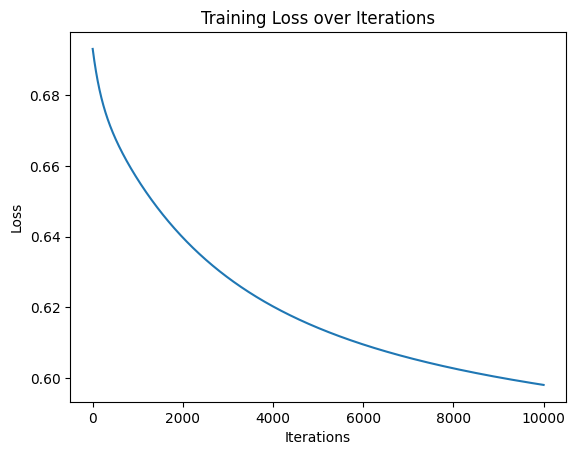

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
log_reg = LogisticRegression()
log_reg.train(X_train, y_train, iterations=10000, lr=0.001)

Training Accuracy

In [ ]:
log_reg.test(X_train,y_train)


Success: 177/242 (73.14)


Test-Accuracy

In [ ]:
log_reg.test(X_test,y_test)


Success: 45/61 (73.77)


**Using Scikit-learn Inbuilt library**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df = df.values

In [ ]:
X = df[:, selected_indices]
y = df[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8852459016393442


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[30  0]
 [ 7 24]]


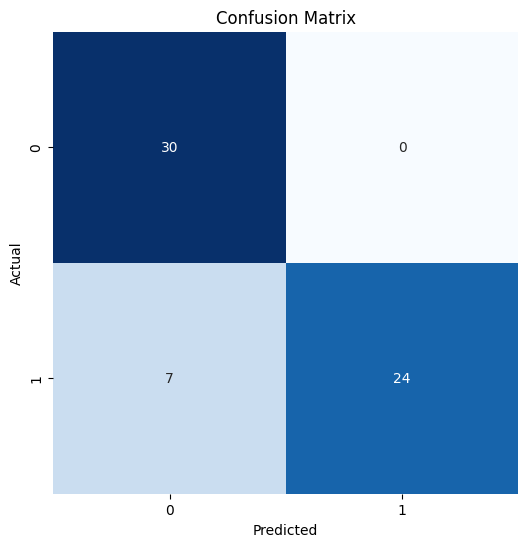

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Analysis-Report**

**Explanation about the dataset**

1.Age Distribution:
* The average age of the individuals in the dataset is approximately 54.44 years, with a standard deviation of 9.04 years.
* The youngest individual in the dataset is 29 years old, while the oldest is 77 years old.
* The median age (50th percentile) is 56 years, indicating that half of the individuals are younger than 56 and half are older.
2.Gender Distribution:
* The dataset includes predominantly males, with a mean of 0.68, where 1 represents male and 0 represents female.
* This implies that approximately 68% of the individuals in the dataset are male.
3.Chest Pain (cp) Distribution:
* The chest pain type (cp) ranges from 0 to 3.
* The most common type of chest pain reported in the dataset is type 2 (value 2.0), with a mean of approximately 2.16.
* Type 0 chest pain is the least common, with a minimum value of 0.
4.Blood Pressure (trestbps):
* The average resting blood pressure is approximately 131.69 mm Hg, with a standard deviation of 17.60 mm Hg.
* The minimum recorded resting blood pressure is 94 mm Hg, while the maximum is 200 mm Hg.
* 75% of the individuals have a resting blood pressure below 140 mm Hg.
5.Cholesterol (chol):
* The mean serum cholesterol level is approximately 246.69 mg/dl, with a standard deviation of 51.78 mg/dl.
* The minimum recorded cholesterol level is 126 mg/dl, while the maximum is 564 mg/dl.
6.Fasting Blood Sugar (fbs):
* Approximately 14.85% of individuals have fasting blood sugar levels above 120 mg/dl.
7.Resting Electrocardiographic Results (restecg):
* The resting electrocardiographic results range from 0 to 2, with a mean of approximately 0.99.
*Most individuals in the dataset have a resting electrocardiographic result of 1.
8.Maximum Heart Rate Achieved (thalach):
* The average maximum heart rate achieved is approximately 149.61 beats per minute (bpm), with a standard deviation of 22.88 bpm.
* The minimum recorded maximum heart rate achieved is 71 bpm, while the maximum is 202 bpm.
9.Exercise Induced Angina (exang):
* Approximately 32.67% of individuals experience exercise-induced angina.
10.ST Depression Induced by Exercise Relative to Rest (oldpeak):
* The average ST depression induced by exercise relative to rest is approximately 1.04 mm, with a standard deviation of 1.16 mm.
* The maximum recorded ST depression is 6.2 mm.
11.Number of Major Vessels Colored by Fluoroscopy (ca):
* The mean number of major vessels colored by fluoroscopy is approximately 0.66, with a standard deviation of 0.93.
* The minimum recorded value is 0, while the maximum is 3.
12.Thalassemia (thal):
* The thalassemia category ranges from 1 to 3, with a mean of approximately 1.83.
13.Target Variable (target):
* The target variable represents the presence of heart disease, with 1 indicating the presence and 0 indicating the absence.
Approximately 45.87% of individuals in the dataset have heart disease.

**Explanation about the implementation**

1.Data Pre-processing:
* The dataset "HeartDisease.csv" was loaded from Google Drive.
* The dataset contains 14 columns, including features and the target variable ('target').
* No missing values were found in the dataset.
* Duplicate rows were identified and printed.
* The data types of columns were inspected.
2.Feature Correlation Analysis:
* Pearson correlation coefficients were calculated between each feature and the target variable using the Pearson coefficient formula.
* The correlation values were sorted in ascending order to determine the strength of the relationship between features and the target variable.
* Features such as 'thal', 'ca', 'exang', 'oldpeak', and 'cp' showed relatively stronger positive correlations with the target variable.
3.Model Implementation:
* Selected features ('cp', 'oldpeak', 'exang', 'ca', 'thal') were used for model training.
* The logistic regression model was implemented to predict the target variable based on the selected features.
* The model included methods for sigmoid activation, prediction, loss function computation, gradient descent optimization, training, and testing.
4.Model Training and Evaluation:
* On the dataset 80-20 train-test split was performed.
* The logistic regression model was trained using the training data with 10,000 iterations and a learning rate of 0.001.
* The training loss over iterations was plotted to visualize the convergence of the model during training.
* The trained model was evaluated on the test data, achieving a success rate of approximately 73.77% on the test set.
* Implemented the same model using scikit learn in-bulit library,got an accuracy of 88%
5.Key Findings:
* The logistic regression model achieved a moderate success rate in predicting the presence of heart disease based on the selected features.
* Features such as 'thal', 'ca', 'exang', 'oldpeak', and 'cp' showed relatively stronger positive correlations with the presence of heart disease, indicating their importance in predicting the target variable.
* The training loss decreased over iterations, indicating that the model was converging during training.